# **Analysis of world bank data**

## **DATA CLEANING**

In [1]:
import pandas as pd
import numpy as np

In [2]:
country = pd.read_csv('/content/Metadata_Country.csv')
population = pd.read_csv('/content/country_population.csv')
life_expectancy = pd.read_csv('/content/life_expectancy.csv')
fertility_rate = pd.read_csv('/content/fertility_rate.csv')

In [3]:
country.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,SNA data for 2000-2011 are updated from offici...,Aruba,NaN
1,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan,NaN
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania,NaN
4,AND,Europe & Central Asia,High income,WB-3 code changed from ADO to AND to align wit...,Andorra,NaN


In [4]:
country = country.rename(columns = {'TableName':'Country Name'})
country.head()

,Country Code,Region,IncomeGroup,SpecialNotes,Country Name,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,SNA data for 2000-2011 are updated from offici...,Aruba,NaN
1,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan,NaN
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania,NaN
4,AND,Europe & Central Asia,High income,WB-3 code changed from ADO to AND to align wit...,Andorra,NaN


In [5]:
country = country[['Country Code','Country Name','Region']]
country.shape

(263, 3)

In [6]:
country.head()

,Country Code,Country Name,Region
0,ABW,Aruba,Latin America & Caribbean
1,AFG,Afghanistan,South Asia
2,AGO,Angola,Sub-Saharan Africa
3,ALB,Albania,Europe & Central Asia
4,AND,Andorra,Europe & Central Asia


In [7]:
population.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0


In [8]:
population.isna().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              4
                 ..
2012              2
2013              2
2014              2
2015              2
2016              2
Length: 61, dtype: int64

In [9]:
## remove unnecessary columns from population data
population.drop(['Country Name','Indicator Name','Indicator Code'], axis=1, inplace = True)
population.head()


,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,ABW,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
1,AFG,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,10604346.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0
2,AGO,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,6523791.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0
3,ALB,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
4,AND,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0


In [10]:
##remove missing values from population dataset column
population.dropna(axis=0, inplace=True)
population.shape

(258, 58)

In [11]:
years = [str(y) for y in range(1960,2017)]

In [12]:
dataset1 = pd.melt(population, id_vars=['Country Code'],value_vars=years,var_name='Year',value_name='Population')
dataset1.head()

,Country Code,Year,Population
0,ABW,1960,54211.0
1,AFG,1960,8996351.0
2,AGO,1960,5643182.0
3,ALB,1960,1608800.0
4,AND,1960,13411.0


In [13]:
life_expectancy.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662,66.074,66.444,66.787,67.113,67.435,...,74.576,74.725,74.872,75.016,75.158,75.299,75.440,75.582,75.725,75.867
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.292,32.742,33.185,33.624,34.060,34.495,...,59.694,60.243,60.754,61.226,61.666,62.086,62.494,62.895,63.288,63.673
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,33.251,33.573,33.914,34.272,34.645,35.031,...,55.096,56.189,57.231,58.192,59.042,59.770,60.373,60.858,61.241,61.547
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.279,63.298,64.187,64.911,65.461,65.848,...,75.656,75.943,76.281,76.652,77.031,77.389,77.702,77.963,78.174,78.345
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
life_expectancy.shape

(264, 61)

In [15]:
life_expectancy.isna().sum()

Country Name       0
Country Code       0
Indicator Name     0
Indicator Code     0
1960              29
                  ..
2012              17
2013              19
2014              19
2015              20
2016              19
Length: 61, dtype: int64

In [16]:
## remove unnecessary columns from life_expectancy data
life_expectancy.drop(['Country Name','Indicator Name','Indicator Code'], axis=1, inplace = True)
life_expectancy.head()

,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,ABW,65.662,66.074,66.444,66.787,67.113,67.435,67.762,68.095,68.436,...,74.576,74.725,74.872,75.016,75.158,75.299,75.440,75.582,75.725,75.867
1,AFG,32.292,32.742,33.185,33.624,34.060,34.495,34.928,35.361,35.796,...,59.694,60.243,60.754,61.226,61.666,62.086,62.494,62.895,63.288,63.673
2,AGO,33.251,33.573,33.914,34.272,34.645,35.031,35.426,35.828,36.234,...,55.096,56.189,57.231,58.192,59.042,59.770,60.373,60.858,61.241,61.547
3,ALB,62.279,63.298,64.187,64.911,65.461,65.848,66.108,66.302,66.485,...,75.656,75.943,76.281,76.652,77.031,77.389,77.702,77.963,78.174,78.345
4,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
##remove missing values from life_expectancy dataset column
life_expectancy.dropna(axis=0, inplace=True)
life_expectancy.shape

(235, 58)

In [18]:
dataset2 = pd.melt(life_expectancy, id_vars=['Country Code'],value_vars=years,var_name='Year',value_name='life_expectancy')
dataset2.head()

,Country Code,Year,life_expectancy
0,ABW,1960,65.662000
1,AFG,1960,32.292000
2,AGO,1960,33.251000
3,ALB,1960,62.279000
4,ARB,1960,46.825065


In [19]:
fertility_rate.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.820,4.655,4.471,4.271,4.059,3.842,...,1.763,1.764,1.769,1.776,1.783,1.791,1.796,1.800,1.801,1.800
1,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.450,7.450,7.450,7.450,7.450,7.450,...,6.460,6.254,6.038,5.816,5.595,5.380,5.174,4.981,4.802,4.635
2,Angola,AGO,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.478,7.524,7.563,7.592,7.611,7.619,...,6.368,6.307,6.238,6.162,6.082,6.000,5.920,5.841,5.766,5.694
3,Albania,ALB,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.489,6.401,6.282,6.133,5.960,5.773,...,1.668,1.650,1.646,1.653,1.668,1.685,1.700,1.710,1.714,1.713
4,Andorra,AND,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.180,1.250,1.190,1.270,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
fertility_rate.shape

(264, 61)

In [21]:
fertility_rate.isna().sum()

Country Name       0
Country Code       0
Indicator Name     0
Indicator Code     0
1960              28
                  ..
2012              16
2013              18
2014              18
2015              17
2016              18
Length: 61, dtype: int64

In [22]:
## remove unnecessary columns from fertility_rate data
fertility_rate.drop(['Country Name','Indicator Name','Indicator Code'], axis=1, inplace = True)
fertility_rate.head()

,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,ABW,4.820,4.655,4.471,4.271,4.059,3.842,3.625,3.417,3.226,...,1.763,1.764,1.769,1.776,1.783,1.791,1.796,1.800,1.801,1.800
1,AFG,7.450,7.450,7.450,7.450,7.450,7.450,7.450,7.450,7.450,...,6.460,6.254,6.038,5.816,5.595,5.380,5.174,4.981,4.802,4.635
2,AGO,7.478,7.524,7.563,7.592,7.611,7.619,7.618,7.613,7.608,...,6.368,6.307,6.238,6.162,6.082,6.000,5.920,5.841,5.766,5.694
3,ALB,6.489,6.401,6.282,6.133,5.960,5.773,5.581,5.394,5.218,...,1.668,1.650,1.646,1.653,1.668,1.685,1.700,1.710,1.714,1.713
4,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.180,1.250,1.190,1.270,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
##remove missing values from fertility_rate dataset column
fertility_rate.dropna(axis=0, inplace=True)
fertility_rate.shape

(235, 58)

In [24]:
dataset3 = pd.melt(fertility_rate, id_vars=['Country Code'],value_vars=years,var_name='Year',value_name='fertility_rate')
dataset3.head()

,Country Code,Year,fertility_rate
0,ABW,1960,4.820000
1,AFG,1960,7.450000
2,AGO,1960,7.478000
3,ALB,1960,6.489000
4,ARB,1960,6.948747


In [25]:
dataset = country.merge(dataset1, on=['Country Code']).merge(dataset2, on=['Country Code','Year']).merge(dataset3, on=['Country Code','Year'])
dataset.head()

,Country Code,Country Name,Region,Year,Population,life_expectancy,fertility_rate
0,ABW,Aruba,Latin America & Caribbean,1960,54211.0,65.662,4.820
1,ABW,Aruba,Latin America & Caribbean,1961,55438.0,66.074,4.655
2,ABW,Aruba,Latin America & Caribbean,1962,56225.0,66.444,4.471
3,ABW,Aruba,Latin America & Caribbean,1963,56695.0,66.787,4.271
4,ABW,Aruba,Latin America & Caribbean,1964,57032.0,67.113,4.059


In [26]:
dataset.shape

(13224, 7)

In [27]:
dataset.isna().sum()

Country Code          0
Country Name          0
Region             2622
Year                  0
Population            0
life_expectancy       0
fertility_rate        0
dtype: int64

In [28]:
Region_mode=dataset["Region"].mode()[0]
dataset["Region"].fillna(Region_mode,inplace=True)

In [29]:
dataset.shape

(13224, 7)

In [30]:
dataset.isna().sum()

Country Code       0
Country Name       0
Region             0
Year               0
Population         0
life_expectancy    0
fertility_rate     0
dtype: int64

In [31]:
dataset.head()

,Country Code,Country Name,Region,Year,Population,life_expectancy,fertility_rate
0,ABW,Aruba,Latin America & Caribbean,1960,54211.0,65.662,4.820
1,ABW,Aruba,Latin America & Caribbean,1961,55438.0,66.074,4.655
2,ABW,Aruba,Latin America & Caribbean,1962,56225.0,66.444,4.471
3,ABW,Aruba,Latin America & Caribbean,1963,56695.0,66.787,4.271
4,ABW,Aruba,Latin America & Caribbean,1964,57032.0,67.113,4.059


In [32]:
dataset.shape

(13224, 7)

 DATA VISUALIZATION

In [33]:
# import for interactive visualization of graphs
import plotly.express as px
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [34]:
# create the scatter chart using Plotly Express
fig_fertility_expectation_region = px.scatter(data_frame=dataset,
                 x='fertility_rate',
                 y='life_expectancy',
                 size='Population',
                 size_max=50,
                 hover_name='Country Name',
                 color='Region',
                 animation_frame='Year',
                 animation_group='Country Code',
                 labels={'Region': 'Region'},
                 range_x=[0, 10],
                 range_y=[10, 90])

fig_fertility_expectation_region.update_layout(title='Fertility Rate vs. Life Expectancy',
                  xaxis_title='Fertility Rate',
                  yaxis_title='Life Expectancy')

fig_fertility_expectation_region.show()

<Axes: ylabel='count'>

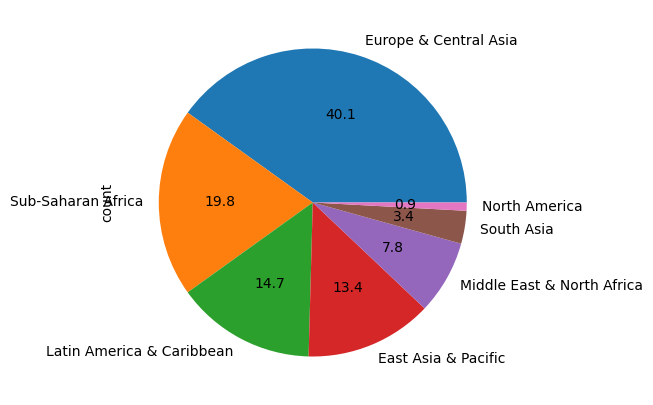

In [35]:
dataset['Region'].value_counts().plot(kind='pie',autopct='%1.1f',figsize=(5,5))

<Axes: xlabel='Region'>

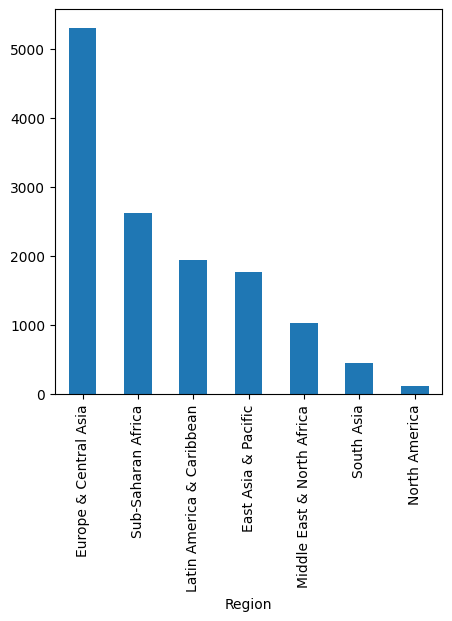

In [36]:
dataset['Region'].value_counts().plot(kind='bar',figsize=(5,5))

In [37]:
import matplotlib.pyplot as plt

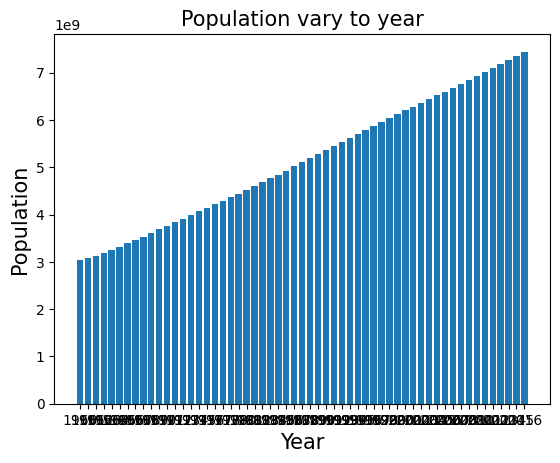

In [38]:
x=dataset['Year']
y=dataset['Population']
plt.bar(x,y)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Population',fontsize=15)
plt.title('Population vary to year', fontsize=15)
plt.show()

In [43]:
px.bar(dataset, x='Region',y='Population',animation_frame='Year',animation_group='Country Code',title="Population vary to Region",color='Region',range_y=[0,1000000000])

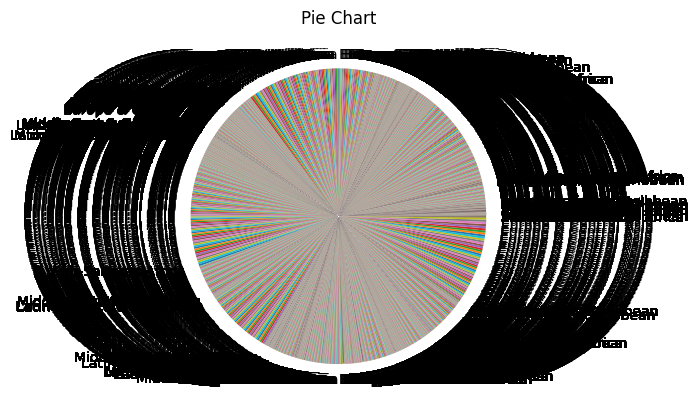

In [40]:
x =dataset['Region']
y =dataset ['Population']

# Create pie chart
plt.pie(y, labels=x)
plt.title('Pie Chart')
plt.show()

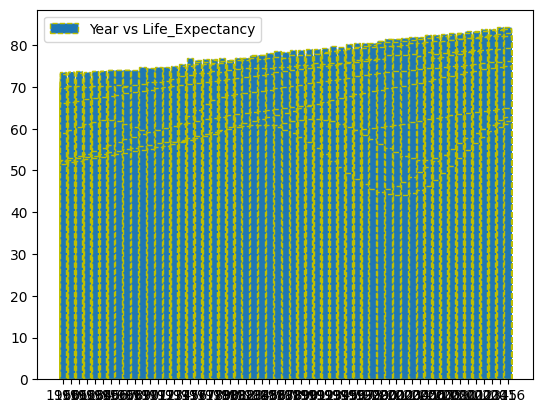

In [41]:
plt.bar(dataset['Year'], dataset['life_expectancy'], edgecolor = 'y', linestyle = '--', label = 'Year vs Life_Expectancy' )
plt.legend(loc = "best")
plt.show()

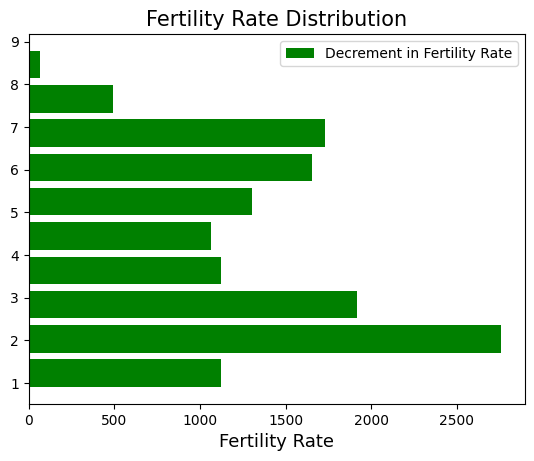

In [42]:
plt.hist(dataset['fertility_rate'], label='Decrement in Fertility Rate', rwidth= 0.8, histtype = 'bar', orientation = 'horizontal', color = 'g')
plt.title("Fertility Rate Distribution", fontsize = 15)
plt.xlabel("Fertility Rate", fontsize = 13)
plt.legend()
plt.show()